In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('Train.csv')

In [3]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


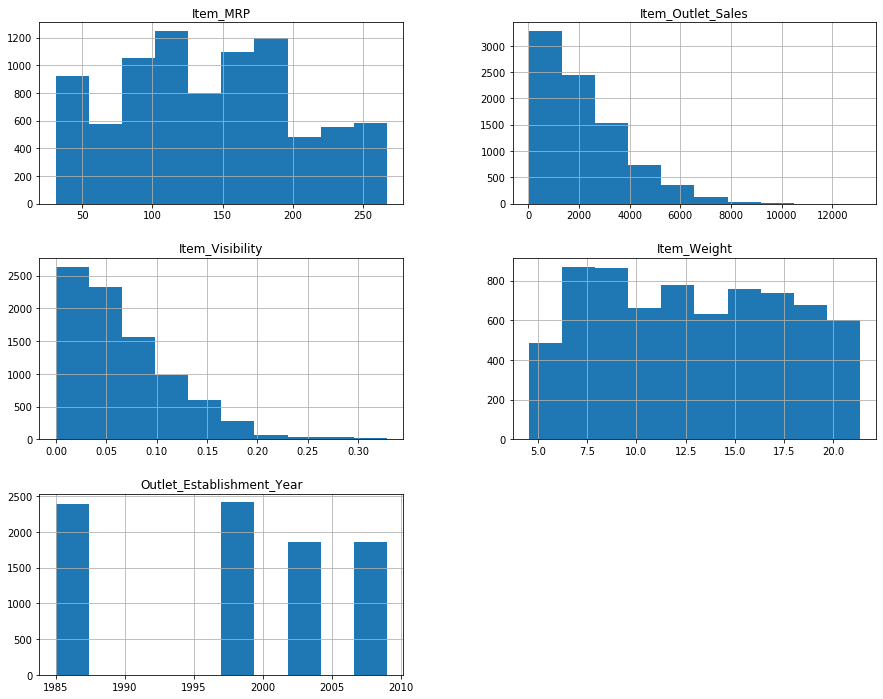

In [5]:
df.hist(figsize=(15,12))
plt.show()

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


Item Weight, Outlet Size columns has missing values

## Correlation with Target Variable

In [7]:
corr_matrix = df.corr()
corr_matrix['Item_Outlet_Sales']

Item_Weight                  0.014123
Item_Visibility             -0.128625
Item_MRP                     0.567574
Outlet_Establishment_Year   -0.049135
Item_Outlet_Sales            1.000000
Name: Item_Outlet_Sales, dtype: float64

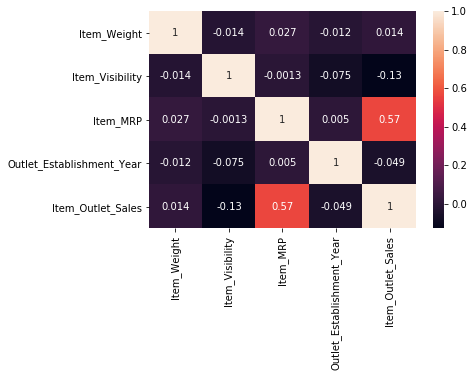

In [8]:
sns.heatmap(corr_matrix,annot=True)
plt.show()

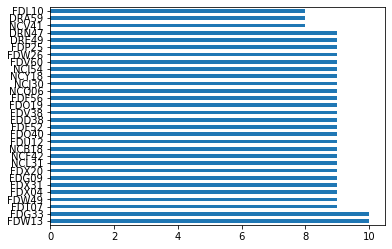

In [9]:
df['Item_Identifier'].value_counts()[:30].plot(kind='barh')

In [10]:
df['Item_Weight'].value_counts()

12.150    86
17.600    82
13.650    77
11.800    76
15.100    68
          ..
7.560      2
9.420      1
5.400      1
6.520      1
7.685      1
Name: Item_Weight, Length: 415, dtype: int64

In [11]:
df.Item_Fat_Content = df.Item_Fat_Content.replace('LF','Low Fat')
df.Item_Fat_Content = df.Item_Fat_Content.replace('reg','Regular')
df.Item_Fat_Content = df.Item_Fat_Content.replace('low fat','Low Fat')

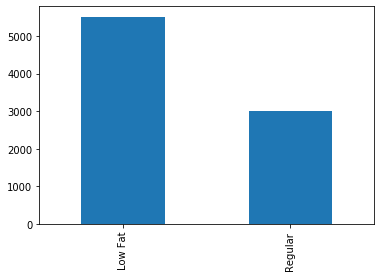

In [12]:
df['Item_Fat_Content'].value_counts().plot(kind='bar')
plt.show()

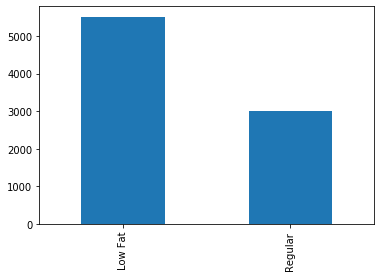

In [13]:
df.Item_Fat_Content.value_counts().plot(kind='bar')
plt.show()

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [15]:
corr_matrix['Item_Visibility']

Item_Weight                 -0.014048
Item_Visibility              1.000000
Item_MRP                    -0.001315
Outlet_Establishment_Year   -0.074834
Item_Outlet_Sales           -0.128625
Name: Item_Visibility, dtype: float64

In [16]:
df['Outlet_Identifier'].value_counts()

OUT027    935
OUT013    932
OUT035    930
OUT049    930
OUT046    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

In [17]:
df['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [18]:
df.groupby(['Outlet_Size'])['Outlet_Location_Type'].value_counts()

Outlet_Size  Outlet_Location_Type
High         Tier 3                   932
Medium       Tier 3                  1863
             Tier 1                   930
Small        Tier 1                  1458
             Tier 2                   930
Name: Outlet_Location_Type, dtype: int64

In [19]:
df.groupby(['Outlet_Location_Type','Outlet_Size'])['Outlet_Type']

In [20]:
df.groupby(['Outlet_Identifier','Outlet_Type'])['Outlet_Size'].value_counts()

Outlet_Identifier  Outlet_Type        Outlet_Size
OUT013             Supermarket Type1  High           932
OUT018             Supermarket Type2  Medium         928
OUT019             Grocery Store      Small          528
OUT027             Supermarket Type3  Medium         935
OUT035             Supermarket Type1  Small          930
OUT046             Supermarket Type1  Small          930
OUT049             Supermarket Type1  Medium         930
Name: Outlet_Size, dtype: int64

In [21]:
df[df['Outlet_Size'].isnull()].groupby(['Outlet_Location_Type','Outlet_Identifier'])['Outlet_Type'].value_counts()

Outlet_Location_Type  Outlet_Identifier  Outlet_Type      
Tier 2                OUT017             Supermarket Type1    926
                      OUT045             Supermarket Type1    929
Tier 3                OUT010             Grocery Store        555
Name: Outlet_Type, dtype: int64

In [22]:
df.groupby(['Outlet_Location_Type','Outlet_Type'])['Outlet_Size'].value_counts()

Outlet_Location_Type  Outlet_Type        Outlet_Size
Tier 1                Grocery Store      Small          528
                      Supermarket Type1  Medium         930
                                         Small          930
Tier 2                Supermarket Type1  Small          930
Tier 3                Supermarket Type1  High           932
                      Supermarket Type2  Medium         928
                      Supermarket Type3  Medium         935
Name: Outlet_Size, dtype: int64

In [23]:
def impute(x):
    if x.Outlet_Identifier == 'OUT010':
        x.Outlet_Size = 'Small'
    elif x.Outlet_Identifier == 'OUT017':
        x.Outlet_Size = 'Medium'
    elif x.Outlet_Identifier == 'OUT045':
        x.Outlet_Size = 'High'
    return (x)

df['Outlet_Size'] = df.apply(impute,axis=1)

In [24]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,FDA15,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,DRC01,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,FDN15,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,FDX07,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,NCD19,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,FDF22,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,FDS36,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,NCJ29,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,FDN46,Tier 3,Supermarket Type2,1845.5976


In [25]:
df['Outlet_Size'].isnull().sum()

0

In [26]:
x=df[df['Item_Weight'].isnull()==True].index

In [27]:
for i in x.astype(int):
    y = df['Item_Type'].iloc[i]
    z = df['Item_Identifier'].iloc[i]
    df['Item_Weight'].iloc[i] = (df.groupby(['Item_Type','Item_Identifier'])['Item_Weight'].median())[y][z]

In [28]:
x = df[df['Item_Weight'].isnull()==True].index

In [29]:
for i in x.astype(int):
    y = df['Item_Type'].iloc[i]
    df['Item_Weight'].iloc[i] = (df.groupby(['Item_Type'])['Item_Weight'].median())[y]

In [30]:
df.groupby(['Item_Type'])['Item_Weight'].median()

Item_Type
Baking Goods             11.6500
Breads                   10.6000
Breakfast                10.6950
Canned                   12.3500
Dairy                    13.3500
Frozen Foods             12.8500
Fruits and Vegetables    13.1000
Hard Drinks               9.8975
Health and Hygiene       12.1500
Household                13.5000
Meat                     12.3500
Others                   14.5000
Seafood                  11.6500
Snack Foods              13.1500
Soft Drinks              11.8000
Starchy Foods            13.5000
Name: Item_Weight, dtype: float64

In [31]:
df['Item_Weight'].isnull().sum()

0

## Transforming the Categorical column

In [32]:
from sklearn.preprocessing import OneHotEncoder

In [33]:
encode = OneHotEncoder()

In [34]:
df['Item_Fat_Content']

0       Low Fat
1       Regular
2       Low Fat
3       Regular
4       Low Fat
         ...   
8518    Low Fat
8519    Regular
8520    Low Fat
8521    Regular
8522    Low Fat
Name: Item_Fat_Content, Length: 8523, dtype: object

In [35]:
fat_encode = pd.DataFrame(encode.fit_transform(df[['Item_Fat_Content']]).toarray())

In [36]:
df1 = df.join(fat_encode)

In [37]:
df1 = df1.drop(['Item_Fat_Content',0],axis=1)

In [38]:
df1.rename(columns={1:'Item_Fat_Content'},inplace=True)

In [39]:
df1['Item_Type'].value_counts().index

Index(['Fruits and Vegetables', 'Snack Foods', 'Household', 'Frozen Foods',
       'Dairy', 'Canned', 'Baking Goods', 'Health and Hygiene', 'Soft Drinks',
       'Meat', 'Breads', 'Hard Drinks', 'Others', 'Starchy Foods', 'Breakfast',
       'Seafood'],
      dtype='object')

In [40]:
type_encode = pd.DataFrame(encode.fit_transform(df1[['Item_Type']]).toarray(),columns=df1['Item_Type'].value_counts().index)

In [41]:
df1 = df1.join(type_encode)

In [42]:
df1.drop(['Item_Type','Fruits and Vegetables'],axis=1,inplace=True)

In [43]:
identifier_encode = pd.DataFrame(encode.fit_transform(df1[['Outlet_Identifier']]).toarray(),
                                 columns=df1['Outlet_Identifier'].value_counts().index)

In [44]:
df1 = df1.join(identifier_encode)

In [45]:
df1.drop(['Outlet_Identifier','OUT027'],axis=1,inplace=True)

In [46]:
year_encode = pd.DataFrame(encode.fit_transform(df1[['Outlet_Establishment_Year']]).toarray(),
                           columns=df1['Outlet_Establishment_Year'].value_counts().index)

In [47]:
df1 = df1.join(year_encode)

In [48]:
df1.drop(['Outlet_Establishment_Year',1985],axis=1,inplace=True)

In [49]:
location_encode = pd.DataFrame(encode.fit_transform(df1[['Outlet_Location_Type']]).toarray(),
                           columns=df1['Outlet_Location_Type'].value_counts().index)
df1 = df1.join(location_encode)
df1.drop(['Outlet_Location_Type','Tier 1'],axis=1,inplace=True)

In [50]:
outlet_encode = pd.DataFrame(encode.fit_transform(df1[['Outlet_Type']]).toarray(),
                           columns=df1['Outlet_Type'].value_counts().index)
df1 = df1.join(outlet_encode)
df1.drop(['Outlet_Type','Supermarket Type1'],axis=1,inplace=True)

In [51]:
df1.drop(['Item_Identifier','Outlet_Size'],axis=1,inplace=True)

## Splitting Train, Test

In [52]:
X = df1.drop('Item_Outlet_Sales',axis=1)
y = df1['Item_Outlet_Sales']

In [53]:
from sklearn.model_selection import train_test_split

In [54]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

## Building Linear Regression Model

In [55]:
from sklearn.linear_model import LinearRegression

In [56]:
lin_reg = LinearRegression()

In [57]:
model = lin_reg.fit(X_train,y_train)

In [58]:
y_pred = model.predict(X_test)

In [59]:
from sklearn.metrics import mean_squared_error

In [60]:
mse = mean_squared_error(y_test,y_pred)

In [61]:
lr_score = np.sqrt(mse)

In [62]:
lr_score

1144.0364571092423

In [63]:
import seaborn as sns

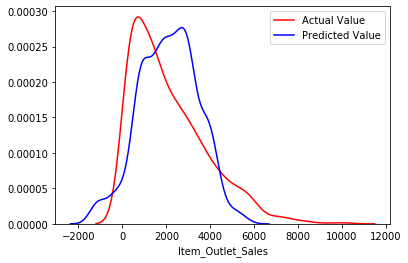

In [64]:
ax1 = sns.distplot(y_test,hist=False,color='r',label='Actual Value')
sns.distplot(y_pred,hist=False,color='b',label='Predicted Value',ax=ax1)
plt.show()

In [65]:
from scipy.stats import zscore

In [66]:
transform = pd.DataFrame(df1[['Item_Weight','Item_Visibility','Item_MRP','Item_Outlet_Sales']])

In [67]:
transform

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales
0,9.300,0.016047,249.8092,3735.1380
1,5.920,0.019278,48.2692,443.4228
2,17.500,0.016760,141.6180,2097.2700
3,19.200,0.000000,182.0950,732.3800
4,8.930,0.000000,53.8614,994.7052
...,...,...,...,...
8518,6.865,0.056783,214.5218,2778.3834
8519,8.380,0.046982,108.1570,549.2850
8520,10.600,0.035186,85.1224,1193.1136
8521,7.210,0.145221,103.1332,1845.5976


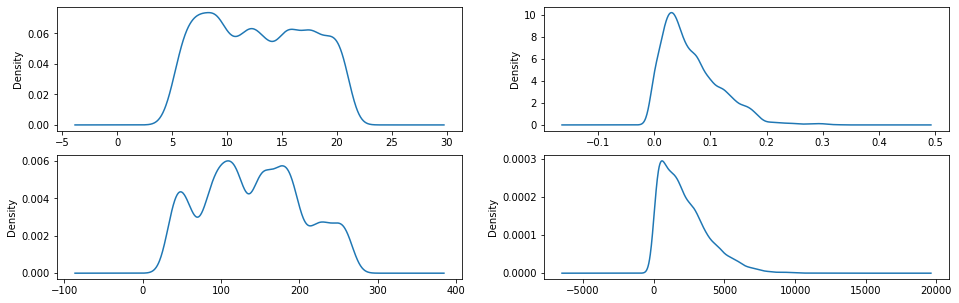

In [68]:
fig,axes = plt.subplots(2,2,figsize=(16,5))
transform['Item_Weight'].plot(kind='kde',ax=axes[0,0])
transform['Item_Visibility'].plot(kind='kde',ax=axes[0,1])
transform['Item_MRP'].plot(kind='kde',ax=axes[1,0])
transform['Item_Outlet_Sales'].plot(kind='kde',ax=axes[1,1])
plt.show()

In [69]:
import statsmodels.api as sm

In [70]:
X_constant = sm.add_constant(X)
mod = sm.OLS(y, X_constant).fit()
predictions = mod.predict(X_constant)
mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Item_Outlet_Sales   R-squared:                       0.564
Model:                            OLS   Adj. R-squared:                  0.562
Method:                 Least Squares   F-statistic:                     392.0
Date:                Fri, 24 Jul 2020   Prob (F-statistic):               0.00
Time:                        19:44:57   Log-Likelihood:                -71988.
No. Observations:                8523   AIC:                         1.440e+05
Df Residuals:                    8494   BIC:                         1.442e+05
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               -514.9796     50.115    -10.276      0.000    -613.217    -416.742
Item_Weight            0.0998      2.656      0.038      0.970      -5.107       5.307
Item_Visibility     -303.8378    248.711     -1.222      0.222    -791.372     183.696
Item_MRP              15.5645      0.198     78.735      0.000      15.177      15.952
Item_Fat_Content      40.7388     28.231      1.443      0.149     -14.601      96.078
Snack Foods            5.6309     84.057      0.067      0.947    -159.142     170.403
Household              7.2720    116.604      0.062      0.950    -221.300     235.844
Frozen Foods          25.5156     62.767      0.407      0.684     -97.522     148.553
Dairy                -41.2797     62.232     -0.663      0.507    -163.269      80.710
Canned               -28.3080     58.864     -0.481      0.631    -143.695      87.079
Baking Goods          29.3298     54.967      0.534      0.594     -78.420     137.079
Health and Hygiene     0.2140     90.185      0.002      0.998    -176.571     176.999
Soft Drinks          -10.9986     68.008     -0.162      0.872    -144.310     122.313
Meat                 -39.7840     59.946     -0.664      0.507    -157.292      77.724
Breads                -0.7242     70.647     -0.010      0.992    -139.209     137.761
Hard Drinks          -22.3407     98.643     -0.226      0.821    -215.705     171.024
Others               184.7365    148.004      1.248      0.212    -105.387     474.860
Starchy Foods        -11.7559     55.256     -0.213      0.832    -120.071      96.559
Breakfast            -27.4848     70.169     -0.392      0.695    -165.032     110.063
Seafood               20.6848    103.057      0.201      0.841    -181.333     222.702
OUT013                29.1273     16.067      1.813      0.070      -2.368      60.622
OUT035                39.7831     15.747      2.526      0.012       8.914      70.652
OUT049               104.6701     13.438      7.789      0.000      78.329     131.012
OUT046              -889.6751     31.110    -28.597      0.000    -950.659    -828.691
OUT045              1020.4538     19.342     52.760      0.000     982.540    1058.368
OUT018                59.5946     15.738      3.787      0.000      28.745      90.444
OUT017               -47.2474     15.724     -3.005      0.003     -78.070     -16.424
OUT010               217.2858     16.221     13.395      0.000     185.488     249.083
OUT019               265.5973     16.219     16.375      0.000     233.803     297.391
1987                  29.1273     16.067      1.813      0.070      -2.368      60.622
1999                 217.2858     16.221     13.395      0.000     185.488     249.083
1997               -1314.5690     41.192    -31.913      0.000   -1395.316   -1233.822
2004                 265.5973     16.2

In [71]:
sns.set(style='whitegrid')

df1['prediction'] = mod.predict(X_constant)
residuals = mod.resid
residuals

0       -281.347490
1       -114.880207
2       -276.433965
3       -344.269765
4         87.857528
           ...     
8518    -639.627763
8519   -1168.218914
8520    -331.621225
8521     455.773687
8522    -446.231844
Length: 8523, dtype: float64

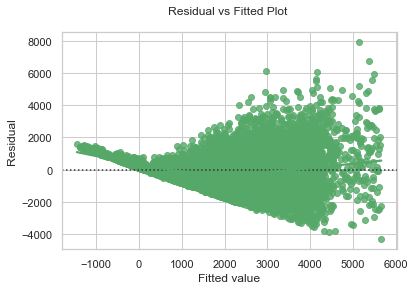

In [72]:
ax = sns.residplot(df1.prediction,residuals,lowess=True,color='g')
ax.set(xlabel = 'Fitted value', ylabel = 'Residual', title = 'Residual vs Fitted Plot \n')
plt.show()

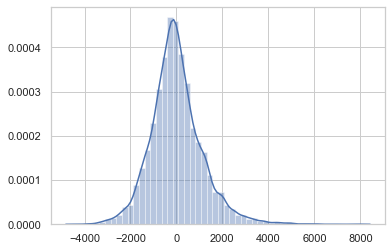

In [73]:
sns.set(style = 'whitegrid')
sns.distplot(residuals)
plt.show()

In [74]:
df1[:11]

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Item_Fat_Content,Snack Foods,Household,Frozen Foods,Dairy,Canned,...,2002,2009,2007,1998,Tier 3,Tier 2,Grocery Store,Supermarket Type3,Supermarket Type2,prediction
0,9.300,0.016047,249.8092,3735.1380,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,4016.485490
1,5.920,0.019278,48.2692,443.4228,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,558.303007
2,17.500,0.016760,141.6180,2097.2700,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,2373.703965
3,19.200,0.000000,182.0950,732.3800,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1076.649765
4,8.930,0.000000,53.8614,994.7052,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,906.847672
5,10.395,0.000000,51.4008,556.6088,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,640.833781
6,13.650,0.012741,57.6588,343.5528,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1031.319050
7,19.000,0.127470,107.7622,4022.7636,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3154.600679
8,16.200,0.016687,96.9726,1076.5986,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1525.102194
9,19.200,0.094450,187.8214,4710.5350,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,3089.849290


In [75]:
transform['Item_Outlet_Sales'] = df1['Item_Outlet_Sales']

In [76]:
z_score = transform.apply(zscore)

In [77]:
z_score

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales
0,-0.769763,-0.970732,1.747454,0.910601
1,-1.497465,-0.908111,-1.489023,-1.018440
2,0.995668,-0.956917,0.010040,-0.049238
3,1.361672,-1.281758,0.660050,-0.849103
4,-0.849422,-1.281758,-1.399220,-0.695373
...,...,...,...,...
8518,-1.294010,-0.181193,1.180783,0.349915
8519,-0.967835,-0.371154,-0.527301,-0.956402
8520,-0.489877,-0.599784,-0.897208,-0.579100
8521,-1.219732,1.532880,-0.607977,-0.196725


In [78]:
df1.drop(['Item_Weight','Item_Visibility','Item_MRP','Item_Outlet_Sales'],axis=1,inplace=True)

In [79]:
df1 = df1.join(z_score)

In [80]:
df1

,Item_Fat_Content,Snack Foods,Household,Frozen Foods,Dairy,Canned,Baking Goods,Health and Hygiene,Soft Drinks,Meat,...,Tier 3,Tier 2,Grocery Store,Supermarket Type3,Supermarket Type2,prediction,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,4016.485490,-0.769763,-0.970732,1.747454,0.910601
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,558.303007,-1.497465,-0.908111,-1.489023,-1.018440
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,2373.703965,0.995668,-0.956917,0.010040,-0.049238
3,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1076.649765,1.361672,-1.281758,0.660050,-0.849103
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,906.847672,-0.849422,-1.281758,-1.399220,-0.695373
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,3418.011163,-1.294010,-0.181193,1.180783,0.349915
8519,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,1717.503914,-0.967835,-0.371154,-0.527301,-0.956402
8520,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,1.0,0.0,0.0,1524.734825,-0.489877,-0.599784,-0.897208,-0.579100
8521,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1389.823913,-1.219732,1.532880,-0.607977,-0.196725


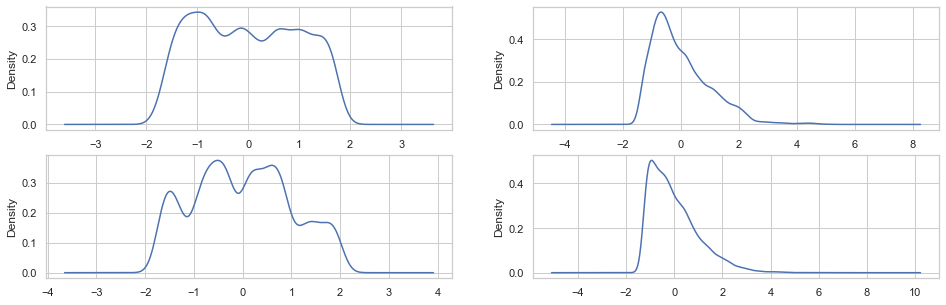

In [81]:
fig,axes = plt.subplots(2,2,figsize=(16,5))
df1['Item_Weight'].plot(kind='kde',ax=axes[0,0])
df1['Item_Visibility'].plot(kind='kde',ax=axes[0,1])
df1['Item_MRP'].plot(kind='kde',ax=axes[1,0])
df1['Item_Outlet_Sales'].plot(kind='kde',ax=axes[1,1])
plt.show()

In [82]:
from sklearn.feature_selection import RFE

In [83]:
df1.shape

(8523, 43)

In [84]:
nof_list = np.arange(1,44)
score_list = []
high_score = 0
nof = 0
for n in range(len(nof_list)):
    rfe = RFE(lin_reg,nof_list[n])
    X_train_rfe = rfe.fit_transform(X_train,y_train)
    X_test_rfe = rfe.transform(X_test)
    lin_reg.fit(X_train_rfe,y_train)
    score = lin_reg.score(X_test_rfe,y_test)
    score_list.append(score)
    if (score > high_score):
        high_score = score
        nof = nof_list[n]
print('Optimum number of features: %d' %nof)
print('Scores with %d features : %f' %(nof, high_score))

Optimum number of features: 37
Scores with 37 features : 0.559015


In [85]:
col = list(X.columns)
rfe = RFE(lin_reg,37)
X_rfe = rfe.fit_transform(X,y)
lin_reg.fit(X_rfe,y)
temp = pd.Series(rfe.support_,index=col)
selected_features_rfe = temp[temp==True].index
print(selected_features_rfe)

Index([  'Item_Visibility',          'Item_MRP',  'Item_Fat_Content',
               'Household',      'Frozen Foods',             'Dairy',
                  'Canned',      'Baking Goods',       'Soft Drinks',
                    'Meat',       'Hard Drinks',            'Others',
           'Starchy Foods',         'Breakfast',           'Seafood',
                  'OUT013',            'OUT035',            'OUT049',
                  'OUT046',            'OUT045',            'OUT018',
                  'OUT017',            'OUT010',            'OUT019',
                      1987,                1999,                1997,
                      2004,                2002,                2009,
                      2007,                1998,            'Tier 3',
                  'Tier 2',     'Grocery Store', 'Supermarket Type3',
       'Supermarket Type2'],
      dtype='object')


In [86]:
from sklearn.linear_model import LassoCV, Lasso

In [87]:
reg = LassoCV()
reg.fit(X,y)
print(reg.alpha_)
print(reg.score(X,y))

60.31040858685904
0.5094098885108423


In [88]:
X1 = df1.drop(['Item_Outlet_Sales','prediction'],axis=1)
y1 = df1['Item_Outlet_Sales']

In [89]:
X1_train,X1_test,y1_train,y1_test = train_test_split(X1,y1,test_size = 0.3,random_state = 1)

In [90]:
lasso = Lasso()

In [91]:
lasso.fit(X1_train,y1_train)
train_score = lasso.score(X1_train,y1_train)
test_score = lasso.score(X1_test,y1_test)
coeff_used = np.sum(lasso.coef_!=0)

In [92]:
print(train_score)
print(test_score)
print(coeff_used)

0.0
-0.0003042078216084487
0


In [93]:
lasso001 = Lasso(alpha=0.01,max_iter=10e5)
lasso001.fit(X1_train,y1_train)

Lasso(alpha=0.01, max_iter=1000000.0)

In [94]:
train_score001 = lasso001.score(X1_train,y1_train)
test_score001 = lasso001.score(X1_test,y1_test)
coef_used001 = np.sum(lasso001.coef_!=0)

In [95]:
print(train_score001)
print(test_score001)
print(coef_used001)

0.5546549965373165
0.5644472782677912
7


In [96]:
lasso00001 = Lasso(alpha=0.0001,max_iter=10e5)
lasso00001.fit(X1_train,y1_train)

Lasso(alpha=0.0001, max_iter=1000000.0)

In [97]:
train_score00001 = lasso00001.score(X1_train,y1_train)
test_score00001 = lasso00001.score(X1_test,y1_test)
coef_used00001 = np.sum(lasso00001.coef_!=0)

In [98]:
print(train_score00001)
print(test_score00001)
print(coef_used00001)

0.561617396156957
0.5664931622056892
34


In [100]:
removed_features = X_train.columns[lasso00001.coef_==0]

In [101]:
removed_features

Index([            'Canned', 'Health and Hygiene',      'Starchy Foods',
                  'Seafood',             'OUT017',                 2002,
                   'Tier 3'],
      dtype='object')

In [102]:
selected_features = X_train.columns[lasso00001.coef_!=0]

In [103]:
df2 = df1[selected_features]

In [104]:
X2 = df2
y2 = df['Item_Outlet_Sales']

In [105]:
X2_train,X2_test,y2_train,y2_test = train_test_split(X2,y2,test_size=0.3,random_state=1)

In [106]:
lin_reg.fit(X2_train,y2_train)

LinearRegression()

In [107]:
y2_pred = lin_reg.predict(X2_test)

In [108]:
mse = mean_squared_error(y2_test,y2_pred)

In [109]:
np.sqrt(mse)

1122.884584038502

In [110]:
df1['Item_Outlet_Sales']

0       0.910601
1      -1.018440
2      -0.049238
3      -0.849103
4      -0.695373
          ...   
8518    0.349915
8519   -0.956402
8520   -0.579100
8521   -0.196725
8522   -0.829594
Name: Item_Outlet_Sales, Length: 8523, dtype: float64

In [111]:
from sklearn.tree import DecisionTreeRegressor

In [112]:
tree = DecisionTreeRegressor()

In [113]:
tree.fit(X2_train,y2_train)

DecisionTreeRegressor()

In [114]:
y2_tree = tree.predict(X2_test)

In [115]:
np.sqrt(mean_squared_error(y2_test,y2_tree))

1533.861907037577

In [116]:
from sklearn.model_selection import GridSearchCV

In [117]:
from sklearn.metrics import r2_score, make_scorer

In [118]:
n_folds = 6
scoring = make_scorer(r2_score)
params = {'max_depth': range(1,40)}
dtree = DecisionTreeRegressor(criterion='mse',random_state=1)

In [119]:
tree = GridSearchCV(dtree,params,cv=n_folds,scoring=scoring,return_train_score='warn')

In [120]:
tree.fit(X2_train,y2_train)

GridSearchCV(cv=6, estimator=DecisionTreeRegressor(random_state=1),
             param_grid={'max_depth': range(1, 40)}, return_train_score='warn',
             scoring=make_scorer(r2_score))

In [121]:
scores = tree.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,mean_train_score,std_train_score
0,0.018984,0.002637,0.011217,0.004226,1,{'max_depth': 1},0.203307,0.250003,0.200498,0.255114,...,0.021455,20,0.242619,0.233305,0.242858,0.233002,0.232162,0.235047,0.236499,0.004495
1,0.028868,0.001106,0.007372,0.001800,2,{'max_depth': 2},0.313280,0.381574,0.348938,0.356983,...,0.023510,12,0.365557,0.351880,0.358672,0.357263,0.355626,0.363602,0.358767,0.004638
2,0.035690,0.003366,0.009180,0.001384,3,{'max_depth': 3},0.408025,0.459959,0.477828,0.478764,...,0.027138,8,0.477174,0.467389,0.464211,0.463606,0.457497,0.467183,0.466177,0.005905
3,0.039894,0.000515,0.008370,0.000786,4,{'max_depth': 4},0.533943,0.553726,0.593436,0.575691,...,0.022376,3,0.588024,0.581722,0.575579,0.578612,0.569012,0.575752,0.578117,0.005864
4,0.044945,0.007968,0.008850,0.001917,5,{'max_depth': 5},0.547850,0.566030,0.613436,0.603792,...,0.023929,1,0.623240,0.616716,0.609478,0.611248,0.605583,0.616003,0.613711,0.005703


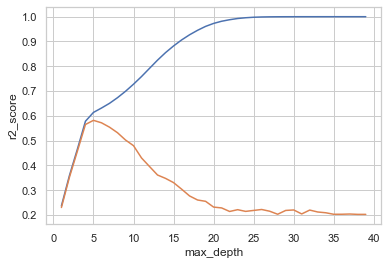

In [122]:
plt.figure()
plt.plot(scores['param_max_depth'],
        scores['mean_train_score'],
        label='training_accuracy')
plt.plot(scores['param_max_depth'],
        scores['mean_test_score'],
        label='training_accuracy')
plt.xlabel('max_depth')
plt.ylabel('r2_score')
plt.show()

In [123]:
X2_train.shape

(5966, 34)

In [124]:
params = {'min_samples_leaf': range(2,200,20)}
tree = GridSearchCV(dtree,params,cv=n_folds,scoring=scoring,return_train_score='warn')
tree.fit(X2_train,y2_train)

GridSearchCV(cv=6, estimator=DecisionTreeRegressor(random_state=1),
             param_grid={'min_samples_leaf': range(2, 200, 20)},
             return_train_score='warn', scoring=make_scorer(r2_score))

In [125]:
score = tree.cv_results_
pd.DataFrame(score).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,mean_train_score,std_train_score
0,0.089850,0.007161,0.007136,0.002224,2,{'min_samples_leaf': 2},0.290463,0.184823,0.250861,0.291058,...,0.053829,10,0.930999,0.931951,0.928927,0.931517,0.927027,0.934586,0.930835,0.002378
1,0.049675,0.003260,0.007474,0.002372,22,{'min_samples_leaf': 22},0.520246,0.551448,0.578886,0.562875,...,0.020945,8,0.659960,0.655673,0.647435,0.651888,0.645416,0.655750,0.652687,0.005038
2,0.050776,0.005368,0.005781,0.003506,42,{'min_samples_leaf': 42},0.536659,0.573326,0.608147,0.596837,...,0.023460,5,0.636468,0.630552,0.622096,0.625190,0.624910,0.632227,0.628574,0.004940
3,0.040293,0.005485,0.005902,0.003681,62,{'min_samples_leaf': 62},0.539593,0.582207,0.611158,0.602815,...,0.023687,3,0.627337,0.619505,0.613196,0.616019,0.613149,0.620777,0.618331,0.004950
4,0.047952,0.004012,0.007637,0.001311,82,{'min_samples_leaf': 82},0.544355,0.591104,0.617485,0.610204,...,0.024686,1,0.621883,0.614154,0.607966,0.610131,0.604316,0.616797,0.612541,0.005808


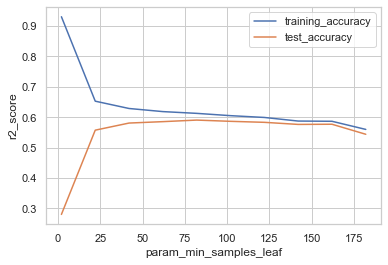

In [126]:
plt.figure()
plt.plot(score['param_min_samples_leaf'],
        score['mean_train_score'],
        label='training_accuracy')
plt.plot(score['param_min_samples_leaf'],
        score['mean_test_score'],
        label='test_accuracy')
plt.xlabel('param_min_samples_leaf')
plt.ylabel('r2_score')
plt.legend()
plt.show()

In [127]:
params = {'min_samples_split': range(5,300,20)}
tree = GridSearchCV(dtree,params,scoring=scoring,cv=n_folds,return_train_score = 'warn')
tree.fit(X2_train,y2_train)

GridSearchCV(cv=6, estimator=DecisionTreeRegressor(random_state=1),
             param_grid={'min_samples_split': range(5, 300, 20)},
             return_train_score='warn', scoring=make_scorer(r2_score))

In [128]:
score = tree.cv_results_
pd.DataFrame(score).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,mean_train_score,std_train_score
0,0.095820,0.005616,0.007721,0.002456,5,{'min_samples_split': 5},0.225257,0.246942,0.198376,0.285437,...,0.039762,15,0.944330,0.942722,0.945680,0.945643,0.942719,0.946244,0.944556,0.001419
1,0.067927,0.003555,0.008166,0.001956,25,{'min_samples_split': 25},0.449806,0.441047,0.452092,0.465962,...,0.031054,14,0.755078,0.759254,0.755434,0.745211,0.752235,0.765168,0.755397,0.006113
2,0.064707,0.005960,0.005544,0.002715,45,{'min_samples_split': 45},0.496169,0.486893,0.520525,0.493797,...,0.028871,13,0.706325,0.704723,0.701249,0.704150,0.699911,0.707140,0.703916,0.002584
3,0.059166,0.006807,0.004449,0.002462,65,{'min_samples_split': 65},0.508480,0.509306,0.554965,0.517965,...,0.023550,12,0.688816,0.684424,0.676239,0.683351,0.677687,0.684848,0.682561,0.004324
4,0.060604,0.005107,0.005397,0.001811,85,{'min_samples_split': 85},0.516429,0.508770,0.571171,0.546331,...,0.024577,11,0.677005,0.676582,0.657147,0.667716,0.663982,0.672639,0.669179,0.007094


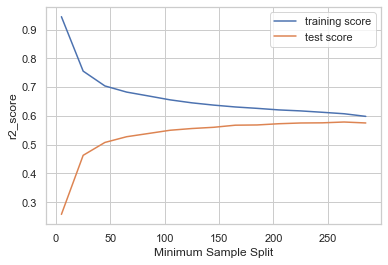

In [129]:
plt.figure()
plt.plot(score['param_min_samples_split'],
        score['mean_train_score'],
        label = 'training score')
plt.plot(score['param_min_samples_split'],
        score['mean_test_score'],
        label = 'test score')
plt.xlabel('Minimum Sample Split')
plt.ylabel('r2_score')
plt.legend()
plt.show()

In [130]:
params = {'max_depth': range(1,6),
         'min_samples_leaf' : range(30,60,5),
         'min_samples_split': range(100,135,5)}
tree = GridSearchCV(dtree,params,scoring=scoring,cv=n_folds)
tree.fit(X2_train,y2_train)

GridSearchCV(cv=6, estimator=DecisionTreeRegressor(random_state=1),
             param_grid={'max_depth': range(1, 6),
                         'min_samples_leaf': range(30, 60, 5),
                         'min_samples_split': range(100, 135, 5)},
             scoring=make_scorer(r2_score))

In [131]:
tree.best_score_

0.5889217371916401

In [132]:
tree.best_params_

{'max_depth': 5, 'min_samples_leaf': 50, 'min_samples_split': 105}

In [133]:
dtree = DecisionTreeRegressor(max_depth = 5, min_samples_leaf = 50, min_samples_split = 105, criterion = 'mse')

In [134]:
dtree.fit(X2_train,y2_train)

DecisionTreeRegressor(max_depth=5, min_samples_leaf=50, min_samples_split=105)

In [135]:
ydtree_pred = dtree.predict(X2_test)

In [136]:
mse= mean_squared_error(y2_test,ydtree_pred)

In [137]:
np.sqrt(mse)

1078.7773622140746

In [138]:
from sklearn.ensemble import RandomForestRegressor

In [139]:
rand = RandomForestRegressor()

In [140]:
rand.fit(X2_train,y2_train)

RandomForestRegressor()

In [141]:
yrand_pred = rand.predict(X2_test)

In [142]:
np.sqrt(mean_squared_error(y2_test,yrand_pred))

1133.0497681213121

In [143]:
rand = RandomForestRegressor(max_depth = 5, min_samples_leaf = 50, min_samples_split = 105)

In [144]:
rand.fit(X2_train,y2_train)
yrand_pred = rand.predict(X2_test)

In [145]:
np.sqrt(mean_squared_error(y2_test,yrand_pred))

1067.4868308570049

In [146]:
params = {'max_depth' : range(1,40)}
n_folds = 6
scoring = make_scorer(r2_score)
rfor = RandomForestRegressor(random_state = 1)
rand_grid = GridSearchCV(rfor,params,cv=n_folds,scoring=scoring,return_train_score='warn')
rand_grid.fit(X2_train,y2_train)

GridSearchCV(cv=6, estimator=RandomForestRegressor(random_state=1),
             param_grid={'max_depth': range(1, 40)}, return_train_score='warn',
             scoring=make_scorer(r2_score))

In [147]:
score = rand_grid.cv_results_
pd.DataFrame(score).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,mean_train_score,std_train_score
0,0.784312,0.031619,0.027113,0.004141,1,{'max_depth': 1},0.220479,0.267458,0.224869,0.274874,...,0.020973,39,0.261027,0.254788,0.261234,0.253371,0.251598,0.256109,0.256354,0.003644
1,1.120236,0.018249,0.030881,0.004252,2,{'max_depth': 2},0.342258,0.414537,0.392660,0.391328,...,0.025510,38,0.398785,0.402518,0.397273,0.387870,0.397106,0.388245,0.395300,0.005422
2,1.463312,0.022464,0.032061,0.004787,3,{'max_depth': 3},0.439382,0.503209,0.520183,0.517228,...,0.032133,37,0.510100,0.515529,0.504709,0.497449,0.508959,0.498093,0.505807,0.006499
3,1.782584,0.017134,0.032929,0.003359,4,{'max_depth': 4},0.541738,0.574780,0.606450,0.590866,...,0.023773,8,0.603580,0.594032,0.590238,0.593958,0.587102,0.599548,0.594743,0.005492
4,2.107841,0.024850,0.034386,0.003257,5,{'max_depth': 5},0.555917,0.591418,0.620275,0.609869,...,0.024451,1,0.630841,0.621127,0.616547,0.619611,0.613791,0.627346,0.621544,0.005903


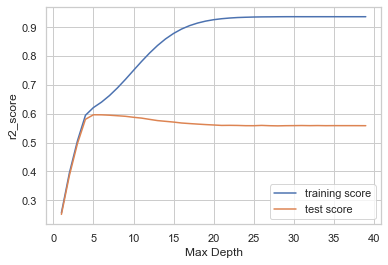

In [148]:
plt.figure()
plt.plot(score['param_max_depth'],
        score['mean_train_score'],
        label = 'training score')
plt.plot(score['param_max_depth'],
        score['mean_test_score'],
        label ='test score')
plt.xlabel('Max Depth')
plt.ylabel('r2_score')
plt.legend()
plt.show()

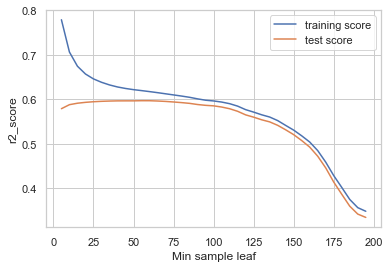

In [149]:
params = {'min_samples_leaf' : range(5,200,5)}
n_folds = 6
scoring = make_scorer(r2_score)
rfor = RandomForestRegressor(random_state = 1)
rand_grid = GridSearchCV(rfor,params,cv=n_folds,scoring=scoring,return_train_score='warn')
rand_grid.fit(X2_train,y2_train)
score = rand_grid.cv_results_
pd.DataFrame(score)

plt.figure()
plt.plot(score['param_min_samples_leaf'],
        score['mean_train_score'],
        label = 'training score')
plt.plot(score['param_min_samples_leaf'],
        score['mean_test_score'],
        label ='test score')
plt.xlabel('Min sample leaf')
plt.ylabel('r2_score')
plt.legend()
plt.show()

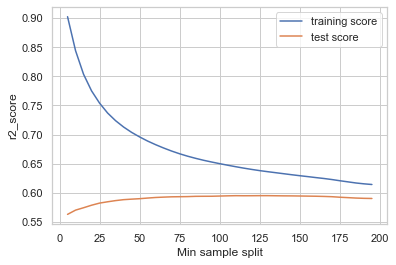

In [150]:
params = {'min_samples_split' : range(5,200,5)}
n_folds = 6
scoring = make_scorer(r2_score)
rfor = RandomForestRegressor(random_state = 1)
rand_grid = GridSearchCV(rfor,params,cv=n_folds,scoring=scoring,return_train_score='warn')
rand_grid.fit(X2_train,y2_train)
score = rand_grid.cv_results_
pd.DataFrame(score)

plt.figure()
plt.plot(score['param_min_samples_split'],
        score['mean_train_score'],
        label = 'training score')
plt.plot(score['param_min_samples_split'],
        score['mean_test_score'],
        label ='test score')
plt.xlabel('Min sample split')
plt.ylabel('r2_score')
plt.legend()
plt.show()

In [151]:
params = {'max_depth' : range(1,6),
         'min_samples_leaf': range(10,30,5),
         'min_samples_split': range(50,105,5)}
n_folds = 6
scoring = make_scorer(r2_score)
rfor = RandomForestRegressor(random_state = 1)
rand_grid = GridSearchCV(rfor,params,cv=n_folds,scoring=scoring,return_train_score='warn')
rand_grid.fit(X2_train,y2_train)

GridSearchCV(cv=6, estimator=RandomForestRegressor(random_state=1),
             param_grid={'max_depth': range(1, 6),
                         'min_samples_leaf': range(10, 30, 5),
                         'min_samples_split': range(50, 105, 5)},
             return_train_score='warn', scoring=make_scorer(r2_score))

In [152]:
rand_grid.best_score_

0.5977243678520335

In [153]:
rand_grid.best_estimator_

RandomForestRegressor(max_depth=5, min_samples_leaf=25, min_samples_split=75,
                      random_state=1)

In [154]:
from sklearn.ensemble import RandomForestRegressor

In [155]:
rfor = RandomForestRegressor(max_depth = 5, min_samples_leaf = 25, min_samples_split = 75)
rfor.fit(X2_train,y2_train)

RandomForestRegressor(max_depth=5, min_samples_leaf=25, min_samples_split=75)

In [156]:
y2rfor_pred = rfor.predict(X2_test)

In [157]:
np.sqrt(mean_squared_error(y2_test,y2rfor_pred))

1070.390368130832

In [158]:
from sklearn.ensemble import GradientBoostingRegressor

In [159]:
grad = GradientBoostingRegressor(max_depth = 2, n_estimators = 90, learning_rate = 0.1,random_state=1 )

In [160]:
grad.fit(X2_train,y2_train)

GradientBoostingRegressor(max_depth=2, n_estimators=90, random_state=1)

In [161]:
errors = [mean_squared_error(y2_test,y2grad) for y2grad in grad.staged_predict(X2_test)]

In [162]:
best_n_estimator = np.argmin(errors)

In [163]:
np.sqrt(errors[best_n_estimator])

1068.3948388658368

In [164]:
1068.3948388658368

1068.3948388658368

In [165]:
params = {'n_estimators' : range(1,200)}
         
grid_grad = GridSearchCV(grad,params,scoring=make_scorer(r2_score),n_jobs = 3,return_train_score = True)
grid_grad.fit(X2_train,y2_train)


GridSearchCV(estimator=GradientBoostingRegressor(max_depth=2, n_estimators=90,
                                                 random_state=1),
             n_jobs=3, param_grid={'n_estimators': range(1, 200)},
             return_train_score=True, scoring=make_scorer(r2_score))

In [166]:
score = grid_grad.cv_results_
pd.DataFrame(score).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.028123,6.249785e-03,0.003125,0.006249,1,{'n_estimators': 1},0.063047,0.068605,0.069182,0.072184,...,0.067280,0.003536,199,0.069143,0.067606,0.067486,0.067213,0.068855,0.068060,0.000782
1,0.031247,9.608003e-07,0.003125,0.006250,2,{'n_estimators': 2},0.116284,0.124472,0.128404,0.129588,...,0.123252,0.005471,198,0.127129,0.125316,0.123916,0.124051,0.125201,0.125122,0.001155
2,0.040623,7.654208e-03,0.003125,0.006250,3,{'n_estimators': 3},0.161090,0.171084,0.177885,0.180346,...,0.170950,0.007447,197,0.175907,0.173625,0.171496,0.172199,0.173403,0.173326,0.001508
3,0.049995,6.248761e-03,0.006250,0.007655,4,{'n_estimators': 4},0.200910,0.213861,0.222418,0.225904,...,0.213778,0.009497,196,0.218748,0.216047,0.213727,0.213175,0.215849,0.215509,0.001976
4,0.062496,7.747687e-07,0.003125,0.006250,5,{'n_estimators': 5},0.235540,0.248557,0.260179,0.262805,...,0.248906,0.011227,195,0.255483,0.252378,0.249136,0.249269,0.251734,0.251600,0.002333


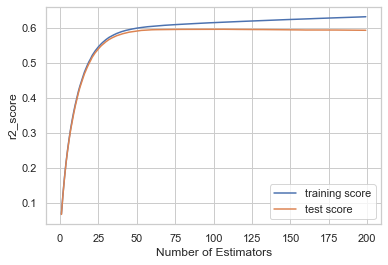

In [167]:
plt.figure()
plt.plot(score['param_n_estimators'],
        score['mean_train_score'],
        label = 'training score')
plt.plot(score['param_n_estimators'],
        score['mean_test_score'],
        label = 'test score')
plt.legend()
plt.xlabel('Number of Estimators')
plt.ylabel('r2_score')
plt.show()

In [168]:
df_test = pd.read_csv('Test.csv')

In [169]:
df_test.Item_Fat_Content = df_test.Item_Fat_Content.replace('LF','Low Fat')
df_test.Item_Fat_Content = df_test.Item_Fat_Content.replace('reg','Regular')
df_test.Item_Fat_Content = df_test.Item_Fat_Content.replace('low fat','Low Fat')

In [170]:
def impute(x):
    if x.Outlet_Identifier == 'OUT010':
        x.Outlet_Size = 'Small'
    elif x.Outlet_Identifier == 'OUT017':
        x.Outlet_Size = 'Medium'
    elif x.Outlet_Identifier == 'OUT045':
        x.Outlet_Size = 'High'
    return (x)

df_test['Outlet_Size'] = df_test.apply(impute,axis=1)

In [171]:
x=df_test[df_test['Item_Weight'].isnull()==True].index
for i in x.astype(int):
    y = df_test['Item_Type'].iloc[i]
    z = df_test['Item_Identifier'].iloc[i]
    df_test['Item_Weight'].iloc[i] = (df.groupby(['Item_Type','Item_Identifier'])['Item_Weight'].median())[y][z]

In [172]:
df_test['Item_Weight'].iloc[1724] = 11.6500

In [173]:
fat_encode = pd.DataFrame(encode.fit_transform(df_test[['Item_Fat_Content']]).toarray())
df1_test = df_test.join(fat_encode)
df1_test = df1_test.drop(['Item_Fat_Content',0],axis=1)
df1_test.rename(columns={1:'Item_Fat_Content'},inplace=True)

In [174]:
type_encode = pd.DataFrame(encode.fit_transform(df1_test[['Item_Type']]).toarray(),columns=df1_test['Item_Type'].value_counts().index)
df1_test = df1_test.join(type_encode)
df1_test.drop(['Item_Type','Fruits and Vegetables'],axis=1,inplace=True)

In [175]:
identifier_encode = pd.DataFrame(encode.fit_transform(df1_test[['Outlet_Identifier']]).toarray(),
                                 columns=df1_test['Outlet_Identifier'].value_counts().index)
df1_test = df1_test.join(identifier_encode)
df1_test.drop(['Outlet_Identifier','OUT027'],axis=1,inplace=True)

In [176]:
year_encode = pd.DataFrame(encode.fit_transform(df1_test[['Outlet_Establishment_Year']]).toarray(),
                           columns=df1_test['Outlet_Establishment_Year'].value_counts().index)
df1_test = df1_test.join(year_encode)
df1_test.drop(['Outlet_Establishment_Year',1985],axis=1,inplace=True)

In [177]:
location_encode = pd.DataFrame(encode.fit_transform(df1_test[['Outlet_Location_Type']]).toarray(),
                           columns=df1_test['Outlet_Location_Type'].value_counts().index)
df1_test = df1_test.join(location_encode)
df1_test.drop(['Outlet_Location_Type','Tier 1'],axis=1,inplace=True)

In [178]:
outlet_encode = pd.DataFrame(encode.fit_transform(df1_test[['Outlet_Type']]).toarray(),
                           columns=df1_test['Outlet_Type'].value_counts().index)
df1_test = df1_test.join(outlet_encode)
df1_test.drop(['Outlet_Type','Supermarket Type1'],axis=1,inplace=True)

In [179]:
df2_test = df1_test.drop(['Item_Identifier','Outlet_Size'],axis=1)

In [180]:
df2_test

,Item_Weight,Item_Visibility,Item_MRP,Item_Fat_Content,Snack Foods,Household,Frozen Foods,Dairy,Baking Goods,Canned,...,2004,2002,2009,2007,1998,Tier 3,Tier 2,Grocery Store,Supermarket Type3,Supermarket Type2
0,20.750,0.007565,107.8622,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,8.300,0.038428,87.3198,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
2,14.600,0.099575,241.7538,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,7.315,0.015388,155.0340,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
4,13.600,0.118599,234.2300,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5676,10.500,0.013496,141.3154,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
5677,7.600,0.142991,169.1448,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
5678,10.000,0.073529,118.7440,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
5679,15.300,0.000000,214.6218,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0


In [181]:
transform = pd.DataFrame(df2_test[['Item_Weight','Item_Visibility','Item_MRP']])
z_score = transform.apply(zscore)
df2_test.drop(['Item_Weight','Item_Visibility','Item_MRP'],axis=1,inplace=True)
df2_test = df2_test.join(z_score)

In [182]:
df2_test

,Item_Fat_Content,Snack Foods,Household,Frozen Foods,Dairy,Baking Goods,Canned,Health and Hygiene,Meat,Soft Drinks,...,2007,1998,Tier 3,Tier 2,Grocery Store,Supermarket Type3,Supermarket Type2,Item_Weight,Item_Visibility,Item_MRP
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.734146,-1.134077,-0.536555
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,-0.939207,-0.531850,-0.868937
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.413574,0.661316,1.629848
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,-1.150714,-0.981416,0.226697
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.198847,1.032540,1.508110
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5676,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,-0.466807,-1.018333,0.004727
5677,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,-1.089516,1.508493,0.455014
5678,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,-0.574171,0.153074,-0.360485
5679,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.563883,-1.281690,1.190844


In [183]:
selected_features = df2_test.columns[lasso00001.coef_!=0]

In [184]:
selected_features

Index([  'Item_Fat_Content',        'Snack Foods',          'Household',
             'Frozen Foods',              'Dairy',       'Baking Goods',
                   'Canned', 'Health and Hygiene',        'Soft Drinks',
              'Hard Drinks',      'Starchy Foods',             'Others',
                'Breakfast',            'Seafood',             'OUT035',
                   'OUT046',             'OUT045',             'OUT018',
                   'OUT017',             'OUT010',             'OUT019',
                       1999,                 1997,                 2004,
                       2002,                 2009,                 2007,
                   'Tier 3',             'Tier 2',      'Grocery Store',
        'Supermarket Type2',        'Item_Weight',    'Item_Visibility',
                 'Item_MRP'],
      dtype='object')

In [185]:
df2_test = df2_test[selected_features]

In [186]:
df2_test.shape

(5681, 34)

In [187]:
rfor.fit(X2,y2)

RandomForestRegressor(max_depth=5, min_samples_leaf=25, min_samples_split=75)

In [188]:
ytest_predict = rfor.predict(df2_test)

In [189]:
ytest_predict

array([2084.36880944,  701.91592187, 1786.07192849, ...,  670.67295211,
       2630.91499507, 1109.06672321])

In [190]:
result =pd.DataFrame()

In [191]:
result = df_test[['Item_Identifier','Outlet_Identifier']]

In [192]:
result['Item_Outlet_Sales'] = ytest_predict

In [193]:
result

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,2084.368809
1,FDW14,OUT017,701.915922
2,NCN55,OUT010,1786.071928
3,FDQ58,OUT017,701.915922
4,FDY38,OUT027,1788.369009
...,...,...,...
5676,FDB58,OUT046,2261.435666
5677,FDD47,OUT018,733.127521
5678,NCO17,OUT045,670.672952
5679,FDJ26,OUT017,2630.914995


In [194]:
result.to_csv('final.csv')

In [195]:
params = {'max_depth' : range(1,6),
         'min_samples_leaf': range(10,30,5),
         'min_samples_split': range(50,105,5)}
n_folds = 9
scoring = make_scorer(r2_score)
rfor = RandomForestRegressor(random_state = 1)
rand_grid = GridSearchCV(rfor,params,cv=n_folds,scoring=scoring,return_train_score='warn')
rand_grid.fit(X2,y2)

GridSearchCV(cv=9, estimator=RandomForestRegressor(random_state=1),
             param_grid={'max_depth': range(1, 6),
                         'min_samples_leaf': range(10, 30, 5),
                         'min_samples_split': range(50, 105, 5)},
             return_train_score='warn', scoring=make_scorer(r2_score))

In [196]:
rand_grid.best_score_

0.5994139913387682

In [197]:
y_pred = rand_grid.predict(X2)

In [198]:
np.sqrt(mean_squared_error(y2,y_pred))

1062.876479859755

In [199]:
rand_grid.best_params_

{'max_depth': 5, 'min_samples_leaf': 25, 'min_samples_split': 90}

In [200]:
rfor = RandomForestRegressor(max_depth = 5, min_samples_leaf = 15, min_samples_split = 70, random_state = 1)

In [201]:
rfor.fit(X2,y2)

RandomForestRegressor(max_depth=5, min_samples_leaf=15, min_samples_split=70,
                      random_state=1)

In [202]:
ytestup_predict = rfor.predict(df2_test)

In [203]:
resultup = pd.DataFrame()

In [204]:
resultup = df_test[['Item_Identifier','Outlet_Identifier']]
resultup['Item_Outlet_Sales'] = ytestup_predict

In [205]:
resultup.to_csv('finalup.csv')